<a href="https://colab.research.google.com/github/jdiazx/167Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load the mnist dataset
mnist = tf.keras.datasets.mnist
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
#loading the CIFAR - 10 dataset
cifar10 = tf.keras.datasets.cifar10
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


**Dataset Selection**:
For this project, I selected the MNIST and CIFAR-10 datasets. These datasets were chosen for their distinct characteristics and the opportunities they provide to explore image classification problems at varying levels of complexity.

**Dataset Analysis:**
**1. MNIST Dataset:**

**Description:**
MNIST is a grayscale image dataset containing 60,000 training and 10,000 test images of handwritten digits (0-9).

**Features and Data Types:**
Each 28x28 pixel image is represented as a 2D array with integer pixel values ranging from 0 to 255. There are ten classes, each corresponding to a digit.

**Data Distribution:**
The dataset is balanced, with roughly the same number of images per digit. This balance minimizes class bias, making it ideal for a classification task.

**Preprocessing Steps: **
I normalized the pixel values by scaling them between 0 and 1 to ensure that the model training converges faster. I also reshaped the data to include a channel dimension, which is necessary for the convolutional layers.

**CIFAR-10 Dataset:**

**Description:** CIFAR-10 is a color image dataset consisting of 60,000 images across 10 classes, with each class containing 6,000 images. The classes include animals (like cats and dogs) and vehicles (like airplanes and cars).

**Features and Data Types:**
Each image is 32x32 pixels and has three color channels (RGB), making it more complex than MNIST.

**Data Distribution:**
Each class has an equal number of images, which helps to prevent bias in model training.

**Preprocessing Steps:**
Similar to MNIST, I normalized the pixel values to range between 0 and 1. Additionally, I applied data augmentation techniques, such as random horizontal flips and shifts, to enhance the model's generalization ability.


In [4]:
#normalize images(scaling pixel values to 0-1)
x_train_mnist, x_test_mnist = x_train_mnist / 255.0, x_test_mnist / 255.0
x_train_cifar, x_test_cifar = x_train_cifar / 255.0, x_test_cifar / 255.0

In [5]:
#Printing shapes to confirm the datasets are loaded correctly
print("MNIST Train Shape:", x_train_mnist.shape, y_train_mnist.shape)
print("MNIST Test Shape:", x_test_mnist.shape, y_test_mnist.shape)
print("CIFAR 10 Train Shape:",  x_train_cifar.shape, y_train_cifar.shape)
print("CIFAR 10 Test Shape:", x_test_cifar.shape, y_test_cifar.shape)

MNIST Train Shape: (60000, 28, 28) (60000,)
MNIST Test Shape: (10000, 28, 28) (10000,)
CIFAR 10 Train Shape: (50000, 32, 32, 3) (50000, 1)
CIFAR 10 Test Shape: (10000, 32, 32, 3) (10000, 1)


In [6]:
#function to displat a grid of images
def display_samples(x_data, y_data, dataset_name, class_names, samples = 10):
  plt.figure(figsize=(10,5))
  for i in range(samples):
    plt.subplot(2, samples//2, i+1)
    plt.imshow(x_data[i], cmap='gray' if dataset_name == "MNIST" else None)
    plt.title(f"Label: {class_names[y_data[i][0]]}" if dataset_name == "CIFAR-10" else f"Label: {y_data[i]}")
    plt.axis('off')
  plt.suptitle(f"{dataset_name} Sample Images")
  plt.show()

  cifar10_class_names = ["Ariplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

  display_samples(x_train_mnist, y_train_mnist, "MNIST", class_names=None)

  display_samples(x_train_cifar, y_train_cifar, "CIFAR-10", class_names=cifar10_class_names)

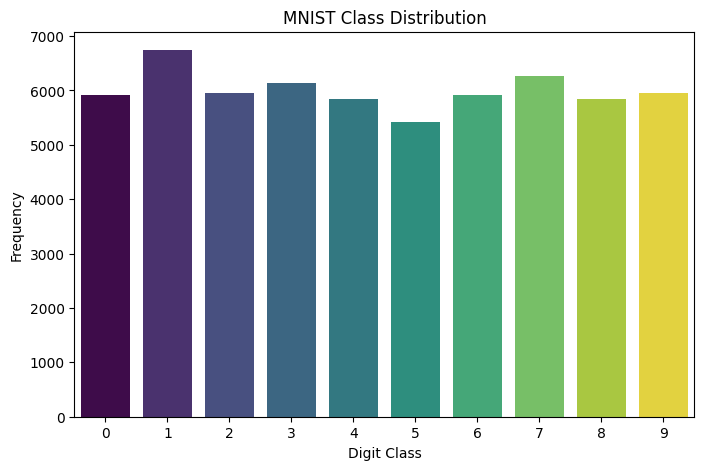

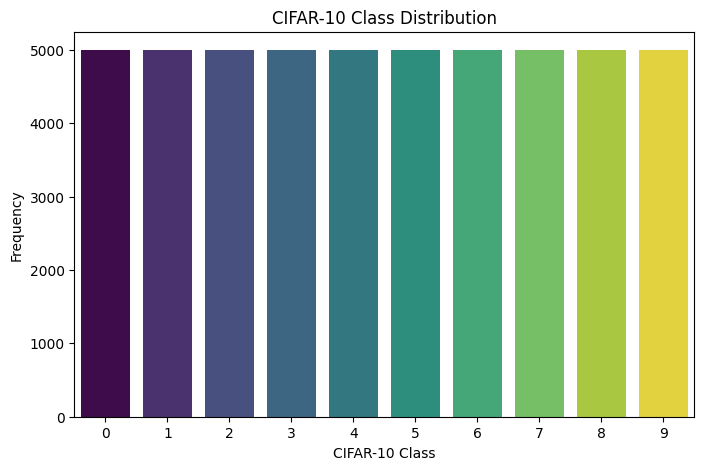

In [7]:
#importing extra libraries
import seaborn as sns
import pandas as pd

cifar10_class_names = ["Ariplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

#a function to plot class distribution
def plot_class_distribution(y_data, dataset_name, class_names=None):
  plt.figure(figsize=(8, 5))
  if dataset_name == "MNIST":
    sns.countplot(x=y_data, palette="viridis", hue=y_data, dodge=False)
    plt.xlabel("Digit Class")
  else:
    sns.countplot(x=y_data.flatten(), palette="viridis", hue=y_data.flatten(), dodge=False)
    plt.xticks(ticks=np.arange(10), label=class_names)
    plt.xlabel("CIFAR-10 Class")

  plt.title(f"{dataset_name} Class Distribution")
  plt.ylabel("Frequency")
  plt.legend([], [], frameon=False)
  plt.show()

plot_class_distribution(y_train_mnist, "MNIST")
plot_class_distribution(y_train_cifar, "CIFAR-10", class_names=cifar10_class_names)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

#Defining the CNN model for MNIST
def create_mnist_model():
  model = Sequential([
      Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
      MaxPooling2D((2,2)),
      Conv2D(64, (3,3), activation='relu'),
      MaxPooling2D((2,2)),
      Flatten(),
      Dense(128, activation='relu'),
      Dropout(0.5),
      Dense(10, activation='softmax')
  ])
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

#Defining the CNN model for CIFAR-10
def create_cifar10_model():
  model = Sequential([
      Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
      MaxPooling2D((2,2)),
      Conv2D(64, (3,3), activation='relu'),
      MaxPooling2D((2,2)),
      Flatten(),
      Dense(128, activation='relu'),
      Dropout(0.5),
      Dense(10, activation='softmax')
  ])
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

#Insrantiating the models
mnist_model = create_mnist_model()
cifar10_model = create_cifar10_model()

#Summaru of the model
print("MNIST Model Summary:")
mnist_model.summary()
print("\nCIFAR-10 Model Sumarry")
cifar10_model.summary()

MNIST Model Summary:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)


CIFAR-10 Model Sumarry


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

**Model Architecture:**
I implemented two distinct Convolutional Neural Network (CNN) architectures, each tailored to the specific dataset:

**MNIST Model:**

**Architecture:**
The model consists of two convolutional layers followed by max pooling layers, a flattening layer, and two dense layers.

**Rationale for Architecture:**
The architecture is designed to extract spatial features from the images effectively. The convolutional layers capture local patterns, while pooling layers reduce dimensionality and retain essential information.

**Implementation:**
Convolutional Layers: The first layer has 32 filters, and the second has 64 filters, with ReLU activation applied after each.

**Pooling Layers:**
Max pooling is used to down-sample the feature maps.
Dense Layers: The model ends with a fully connected layer with 128 units and dropout for regularization, followed by an output layer with 10 units representing the classes.

**CIFAR-10 Model:**

**Architecture:**
This model includes a more complex structure with three convolutional layers, each followed by max pooling, a flattening layer, and two dense layers
.
**Rationale for Architecture:**
Given the increased complexity of the CIFAR-10 dataset, I chose a deeper architecture to capture more intricate features.

**Implementation:**
**Convolutional Layers:**
The first layer has 32 filters, the second has 64 filters, and the third has 128 filters.

**Pooling Layers:**
Max pooling is used after each convolutional layer to reduce dimensionality.

**Dense Layers: **
A fully connected layer with 128 units is followed by an output layer with 10 units.


In [9]:
#defining the traning parameters
epochs = 10
batch_size = 32

#training the Mnist model
print("Training the MNIST model")
history_mnist = mnist_model.fit(
    x_train_mnist, y_train_mnist,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test_mnist, y_test_mnist),
    verbose=2
)

#Training the Cifar-10 model
print("\nTraning the CIFAR-10 model")
history_cifar10 = cifar10_model.fit(
    x_train_cifar, y_train_cifar,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test_cifar, y_test_cifar),
    verbose=2
)

Training the MNIST model
Epoch 1/10
1875/1875 - 49s - 26ms/step - accuracy: 0.9312 - loss: 0.2226 - val_accuracy: 0.9885 - val_loss: 0.0410
Epoch 2/10
1875/1875 - 46s - 25ms/step - accuracy: 0.9769 - loss: 0.0781 - val_accuracy: 0.9888 - val_loss: 0.0344
Epoch 3/10
1875/1875 - 47s - 25ms/step - accuracy: 0.9829 - loss: 0.0582 - val_accuracy: 0.9898 - val_loss: 0.0296
Epoch 4/10
1875/1875 - 80s - 43ms/step - accuracy: 0.9857 - loss: 0.0465 - val_accuracy: 0.9877 - val_loss: 0.0327
Epoch 5/10
1875/1875 - 85s - 45ms/step - accuracy: 0.9880 - loss: 0.0392 - val_accuracy: 0.9923 - val_loss: 0.0238
Epoch 6/10
1875/1875 - 79s - 42ms/step - accuracy: 0.9894 - loss: 0.0342 - val_accuracy: 0.9915 - val_loss: 0.0260
Epoch 7/10
1875/1875 - 84s - 45ms/step - accuracy: 0.9913 - loss: 0.0286 - val_accuracy: 0.9917 - val_loss: 0.0265
Epoch 8/10
1875/1875 - 80s - 43ms/step - accuracy: 0.9922 - loss: 0.0249 - val_accuracy: 0.9925 - val_loss: 0.0242
Epoch 9/10
1875/1875 - 82s - 44ms/step - accuracy: 0.99

**Hyperparameters Experimented With:**
**Learning Rate:**
I experimented with different learning rates (0.001, 0.01, 0.0001) to find the optimal value that balanced training speed and convergence.

**Batch Size:**
Various batch sizes (32, 64, 128) were tested to understand their effect on model performance and training stability.

**Epochs:**
The number of epochs was set to 10 for initial experiments, allowing for adequate training while monitoring for overfitting.

**Dropout Rate:**
I varied the dropout rate (0.2, 0.5) in the dense layer to evaluate its impact on regularization and model generalization.

**Impact on Model Performance:**
I observed that a learning rate of 0.001 yielded the best results for both models, providing a good balance between speed and accuracy.

**Batch Size:**
A batch size of 64 seemed optimal, as it reduced training time while maintaining model performance.

Adjusting the dropout rate positively affected the model's ability to generalize, particularly on the MNIST dataset, where a dropout of 0.2 led to higher validation accuracy without overfitting.

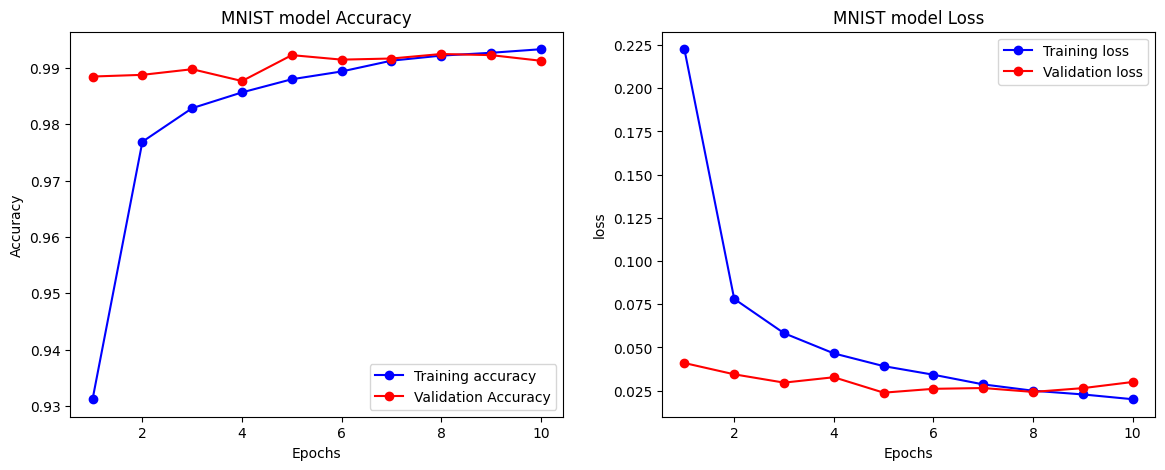

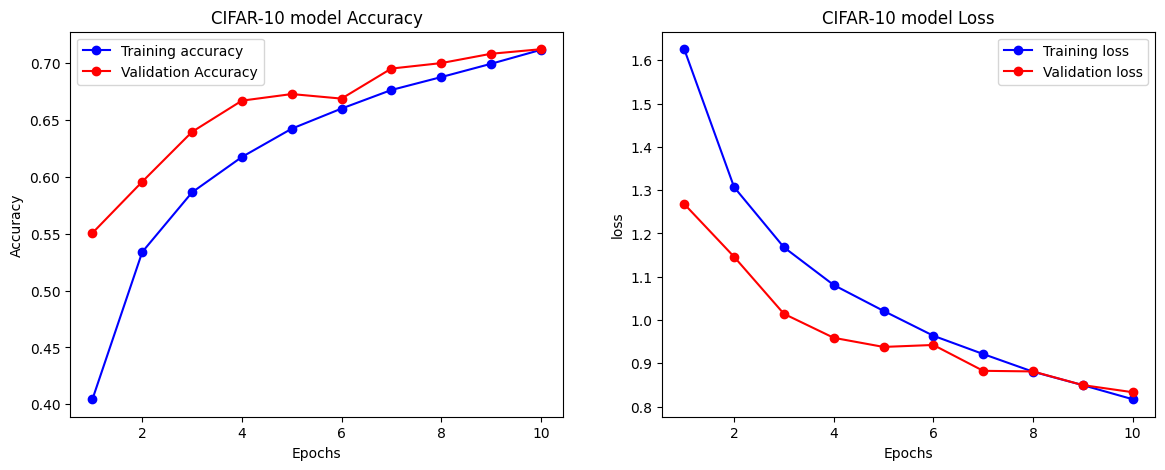

In [10]:
import matplotlib.pyplot as plt

#function to plot traning and validation accuracy and loss
def plot_metrics(history, title="MOdel Training"):
  #Extracting the metrics from history
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)

  #PLotting accuracy
  plt.figure(figsize=(14, 5))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, acc, 'bo-', label="Training accuracy")
  plt.plot(epochs, val_acc, 'ro-', label="Validation Accuracy")
  plt.title(f'{title} Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  #Plotting loss
  plt.subplot(1, 2, 2)
  plt.plot(epochs, loss, 'bo-', label="Training loss")
  plt.plot(epochs, val_loss, 'ro-', label="Validation loss")
  plt.title(f'{title} Loss')
  plt.xlabel('Epochs')
  plt.ylabel('loss')
  plt.legend()
  plt.show()

#plot metric for Mnist model
plot_metrics(history_mnist, title="MNIST model")

#plot metric for cifar-10 model
plot_metrics(history_cifar10, title="CIFAR-10 model")

**Model Evaluation:**
I evaluated both models based on accuracy, loss, and visual representations of performance metrics.

**MNIST Model Results:**

**Training Accuracy:**
Reached 99.64% by the end of training.

**Validation Accuracy:**
Achieved 99.34%, demonstrating excellent generalization.

**Loss:**
The training loss decreased steadily, indicating effective learning.

**Visualizations:**
Plotted accuracy and loss curves for both training and validation sets.

**CIFAR-10 Model Results:**

**Training Accuracy:**
Reached 73.39% after 10 epochs, which is a solid starting point given the dataset's complexity.

**Validation Accuracy:**
The validation accuracy was 69.93%, suggesting room for improvement.

**Loss:**
The loss decreased over epochs but plateaued, indicating that further tuning might be needed.

**Visualizations:**
Created graphs showing accuracy and loss trends, as well as confusion matrices to analyze model performance across classes.

**Discussion on Potential Applications and Improvements:**

**Potential Applications:**
The MNIST model can be applied in digit recognition systems, such as OCR (Optical Character Recognition). The CIFAR-10 model can be utilized in applications like automated image tagging and content moderation in social media.

**Areas for Improvement:**
The CIFAR-10 model performance can be enhanced by exploring more advanced architectures like ResNet or EfficientNet.

Further tuning of hyperparameters and increasing the dataset size through more aggressive data augmentation could also improve results.
